In [31]:
# importing all the necessary libraries to carry out data visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [32]:
# create a pizza_df
pizza_df = pd.read_excel('/kaggle/input/pizza-sales/Data Model - Pizza Sales.xlsx')
# display 1st 5 of the data
pizza_df.head(5)

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [4]:
# info of the data frame 
pizza_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_details_id   48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_id           48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB


In [33]:
# identify the number of duplicated rows
pizza_df.duplicated().sum()

0

In [6]:
# describe the summary stats of pizza_df
# mean, min, max, quartiles, std deviation
# order_details_id, order_id, total_price is redundan
summary_stats = pizza_df.describe()
print(summary_stats)

       order_details_id      order_id      quantity  \
count      48620.000000  48620.000000  48620.000000   
mean       24310.500000  10701.479761      1.019622   
min            1.000000      1.000000      1.000000   
25%        12155.750000   5337.000000      1.000000   
50%        24310.500000  10682.500000      1.000000   
75%        36465.250000  16100.000000      1.000000   
max        48620.000000  21350.000000      4.000000   
std        14035.529381   6180.119770      0.143077   

                          order_date    unit_price   total_price  
count                          48620  48620.000000  48620.000000  
mean   2015-06-29 11:03:43.611682560     16.494132     16.821474  
min              2015-01-01 00:00:00      9.750000      9.750000  
25%              2015-03-31 00:00:00     12.750000     12.750000  
50%              2015-06-28 00:00:00     16.500000     16.500000  
75%              2015-09-28 00:00:00     20.250000     20.500000  
max              2015-12-31 00:00:0

***Total Sales of Pizza Sales***

In [34]:
total_sales = (pizza_df['total_price']).sum()
print("Total Sales: $", total_sales)

Total Sales: $ 817860.05


***Average Order Value***

In [35]:
average_order_value = pizza_df.groupby("order_id")['total_price'].sum().mean()
# round to 2 dp
AOV = round(average_order_value, 2)
print("Average Order Value: $",AOV)

Average Order Value: $ 38.31


***Total Pizza Sold***

In [36]:
total_pizza_sold = pizza_df['quantity'].sum()
print("Total Pizzas Sold: ", total_pizza_sold)

Total Pizzas Sold:  49574


In [37]:
total_orders = len(pizza_df.groupby('order_id').count())
print("Total Orders:", total_orders)

Total Orders: 21350


***Average Pizzas Per Order***

In [38]:
avg_pizzas_per_order = pizza_df['quantity'].sum() / total_orders
AOP = round(avg_pizzas_per_order, 2)
print("Average Pizzas per Order:", AOP)

Average Pizzas per Order: 2.32


In [39]:
category_analysis = pizza_df.groupby('pizza_category').agg(
    #average_unit_price=('unit_price', 'mean'),
    sales_per_category=('unit_price', lambda x: (x * pizza_df['quantity']).sum())
).sort_values(by='sales_per_category', ascending=True)
print("Sales per Category $:\n", category_analysis)

Sales per Category $:
                 sales_per_category
pizza_category                    
Veggie                   193690.45
Chicken                  195919.50
Supreme                  208197.00
Classic                  220053.10


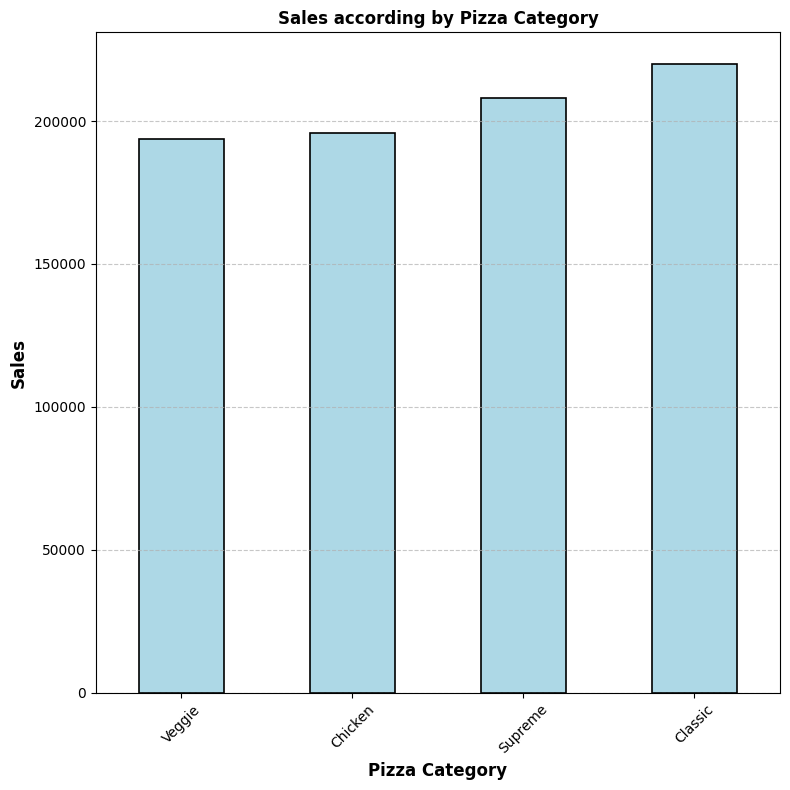

In [40]:
# Sales by Pizza Category 
plt.figure(figsize=(8, 8))
category_analysis['sales_per_category'].plot(kind="bar", color="lightblue", edgecolor="black", linewidth=1.2)
plt.xlabel("Pizza Category", fontsize=12, fontweight='bold')
plt.ylabel("Sales", fontsize=12, fontweight='bold')
plt.title("Sales according by Pizza Category",fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [41]:
# Sales generated by Pizza Size
size_analysis = pizza_df.groupby('pizza_size').agg(
    #average_unit_price=('unit_price', 'mean'),
    sales_per_size=('unit_price', lambda x: (x * pizza_df['quantity']).sum())
).sort_values(by='sales_per_size', ascending=True)
print("Total Sales by Size:\n", size_analysis)

Total Sales by Size:
             sales_per_size
pizza_size                
XXL                1006.60
XL                14076.00
S                178076.50
M                249382.25
L                375318.70


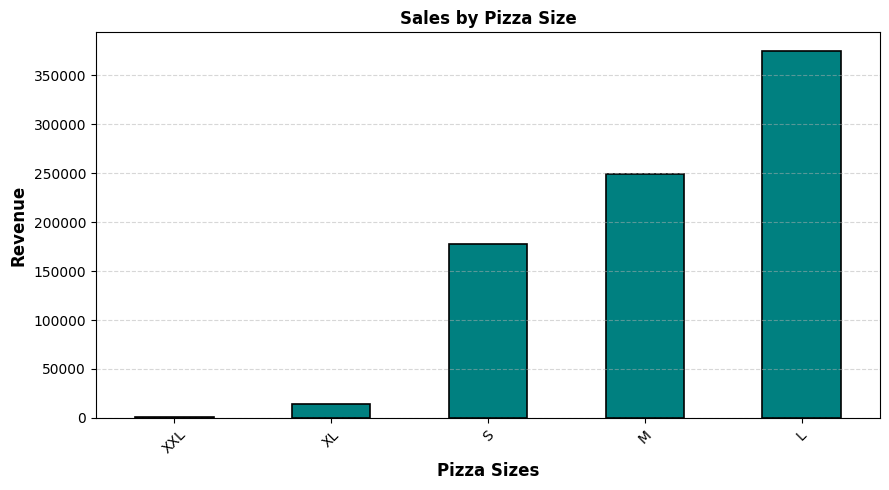

In [42]:
# Revenue by pizza size
plt.figure(figsize=(9, 5))
size_analysis['sales_per_size'].plot(kind='bar', color='teal', edgecolor="black", linewidth=1.2)
plt.xlabel('Pizza Sizes', fontsize=12, fontweight='bold')
plt.ylabel('Revenue', fontsize=12, fontweight='bold')
plt.title('Sales by Pizza Size', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [43]:
# types of pizza that were sold in the restaurant
pizza_df.pizza_name.value_counts()

pizza_name
The Classic Deluxe Pizza                      2416
The Barbecue Chicken Pizza                    2372
The Hawaiian Pizza                            2370
The Pepperoni Pizza                           2369
The Thai Chicken Pizza                        2315
The California Chicken Pizza                  2302
The Sicilian Pizza                            1887
The Spicy Italian Pizza                       1887
The Southwest Chicken Pizza                   1885
The Four Cheese Pizza                         1850
The Italian Supreme Pizza                     1849
The Big Meat Pizza                            1811
The Vegetables + Vegetables Pizza             1510
The Mexicana Pizza                            1456
The Napolitana Pizza                          1451
The Spinach and Feta Pizza                    1432
The Prosciutto and Arugula Pizza              1428
The Pepper Salami Pizza                       1422
The Italian Capocollo Pizza                   1414
The Greek Pizza     

In [44]:
# ingredients that were used
pizza_df.pizza_ingredients.value_counts()

pizza_ingredients
Pepperoni, Mushrooms, Red Onions, Red Peppers, Bacon                                                 2416
Barbecued Chicken, Red Peppers, Green Peppers, Tomatoes, Red Onions, Barbecue Sauce                  2372
Sliced Ham, Pineapple, Mozzarella Cheese                                                             2370
Mozzarella Cheese, Pepperoni                                                                         2369
Chicken, Pineapple, Tomatoes, Red Peppers, Thai Sweet Chilli Sauce                                   2315
Chicken, Artichoke, Spinach, Garlic, Jalapeno Peppers, Fontina Cheese, Gouda Cheese                  2302
Coarse Sicilian Salami, Tomatoes, Green Olives, Luganega Sausage, Onions, Garlic                     1887
Capocollo, Tomatoes, Goat Cheese, Artichokes, Peperoncini verdi, Garlic                              1887
Chicken, Tomatoes, Red Peppers, Red Onions, Jalapeno Peppers, Corn, Cilantro, Chipotle Sauce         1885
Ricotta Cheese, Gorgonzola P

In [ ]:
text = ' '.join(pizza_df['pizza_ingredients'])

plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'black',colormap='gnuplot2_r', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [19]:
#Sales generated by top 5 pizza
top_pizza_analysis = pizza_df.groupby("pizza_name").agg(
    #average_unit_price=('unit_price', 'mean'),
    sales_per_pizza=('unit_price', lambda x: (x * pizza_df['quantity']).sum())
).nlargest(5, "sales_per_pizza")
print("Sales of Top 5 Pizzas:\n", top_pizza_analysis)

Sales of Top 5 Pizzas:
                               sales_per_pizza
pizza_name                                   
The Thai Chicken Pizza               43434.25
The Barbecue Chicken Pizza           42768.00
The California Chicken Pizza         41409.50
The Classic Deluxe Pizza             38180.50
The Spicy Italian Pizza              34831.25


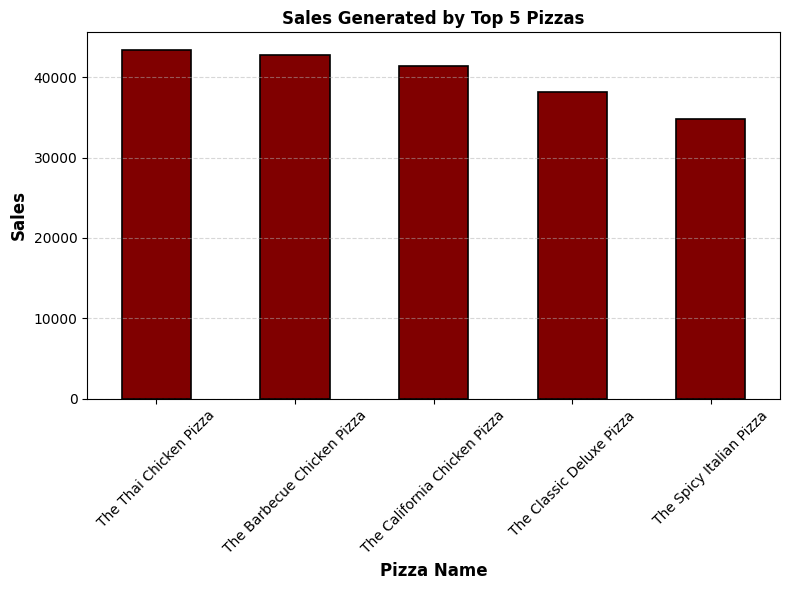

In [20]:
# Revenue by pizza size
plt.figure(figsize=(8, 6))
top_pizza_analysis['sales_per_pizza'].plot(kind='bar', color='maroon', edgecolor="black", linewidth=1.2)
plt.xlabel('Pizza Name', fontsize=12, fontweight='bold')
plt.ylabel('Sales', fontsize=12, fontweight='bold')
plt.title('Sales Generated by Top 5 Pizzas', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [21]:
#Which day has highest num of orders 
pizza_df['day'] = pd.to_datetime(pizza_df['order_date']).dt.strftime('%A')
day_analysis = pizza_df.groupby('day')['order_id'].count().sort_values(ascending=True)
print("Highest Number of Orders by Day of Week:\n", day_analysis)

Highest Number of Orders by Day of Week:
 day
Sunday       5917
Monday       6369
Tuesday      6753
Wednesday    6797
Thursday     7323
Saturday     7355
Friday       8106
Name: order_id, dtype: int64


In [22]:
# year in which the orders were made
pizza_df['order_year'] =pd.DatetimeIndex( pizza_df['order_date']).year
pizza_df['order_year'].value_counts()

order_year
2015    48620
Name: count, dtype: int64

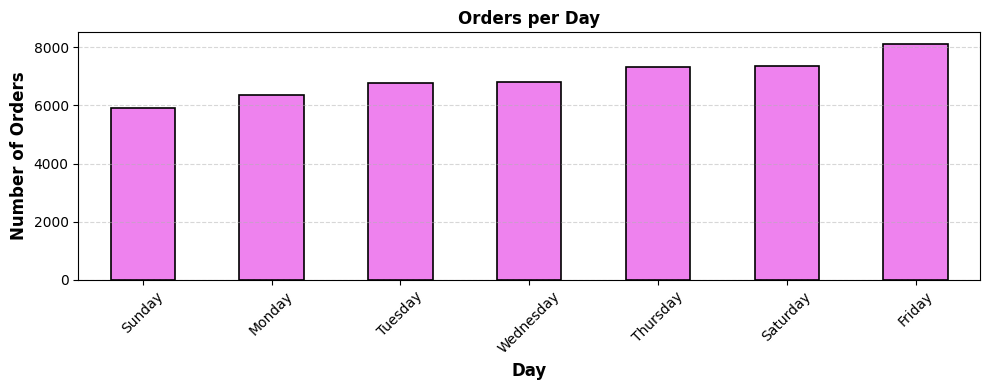

In [23]:
plt.figure(figsize=(10, 4))
day_analysis.plot(kind='bar', color='violet', edgecolor="black", linewidth=1.2)
plt.xlabel('Day', fontsize=12, fontweight='bold')
plt.ylabel('Number of Orders',fontsize=12, fontweight='bold')
plt.title('Orders per Day',fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [24]:
# what time does the order occur the most
# display the time when pizzas are ordered the most along w/ humber of orders
pizza_df['delivery_time'] = pizza_df['order_time'].astype('string').str.slice(0, 5) 
delivery_time_analysis = pizza_df.groupby('delivery_time')['order_id'].count().nlargest(5)
print("Most Occurring Order Times:\n", delivery_time_analysis)

Most Occurring Order Times:
 delivery_time
13:04    198
12:39    158
12:56    155
12:30    153
12:29    149
Name: order_id, dtype: int64


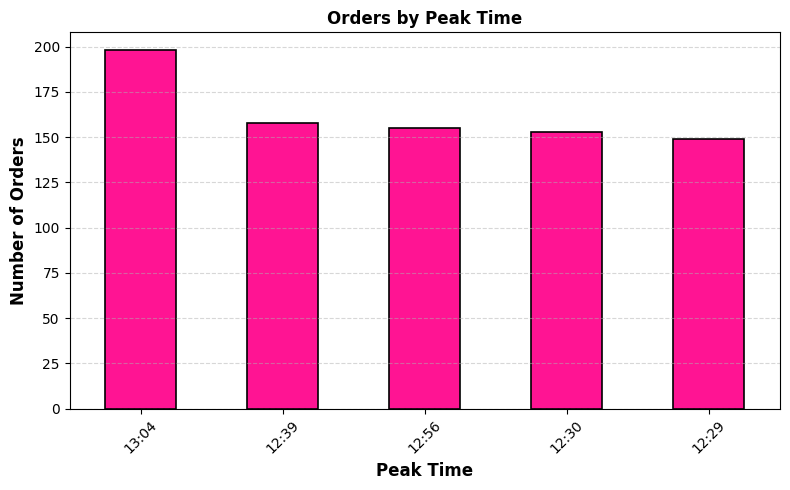

In [25]:
# do a line chart
# Orders by Peak time (bar chart)
plt.figure(figsize=(8, 5))
delivery_time_analysis.plot(kind='bar', color='deeppink', edgecolor="black", linewidth=1.2)
plt.xlabel('Peak Time', fontsize=12, fontweight='bold')
plt.ylabel('Number of Orders', fontsize=12, fontweight='bold')
plt.title('Orders by Peak Time', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

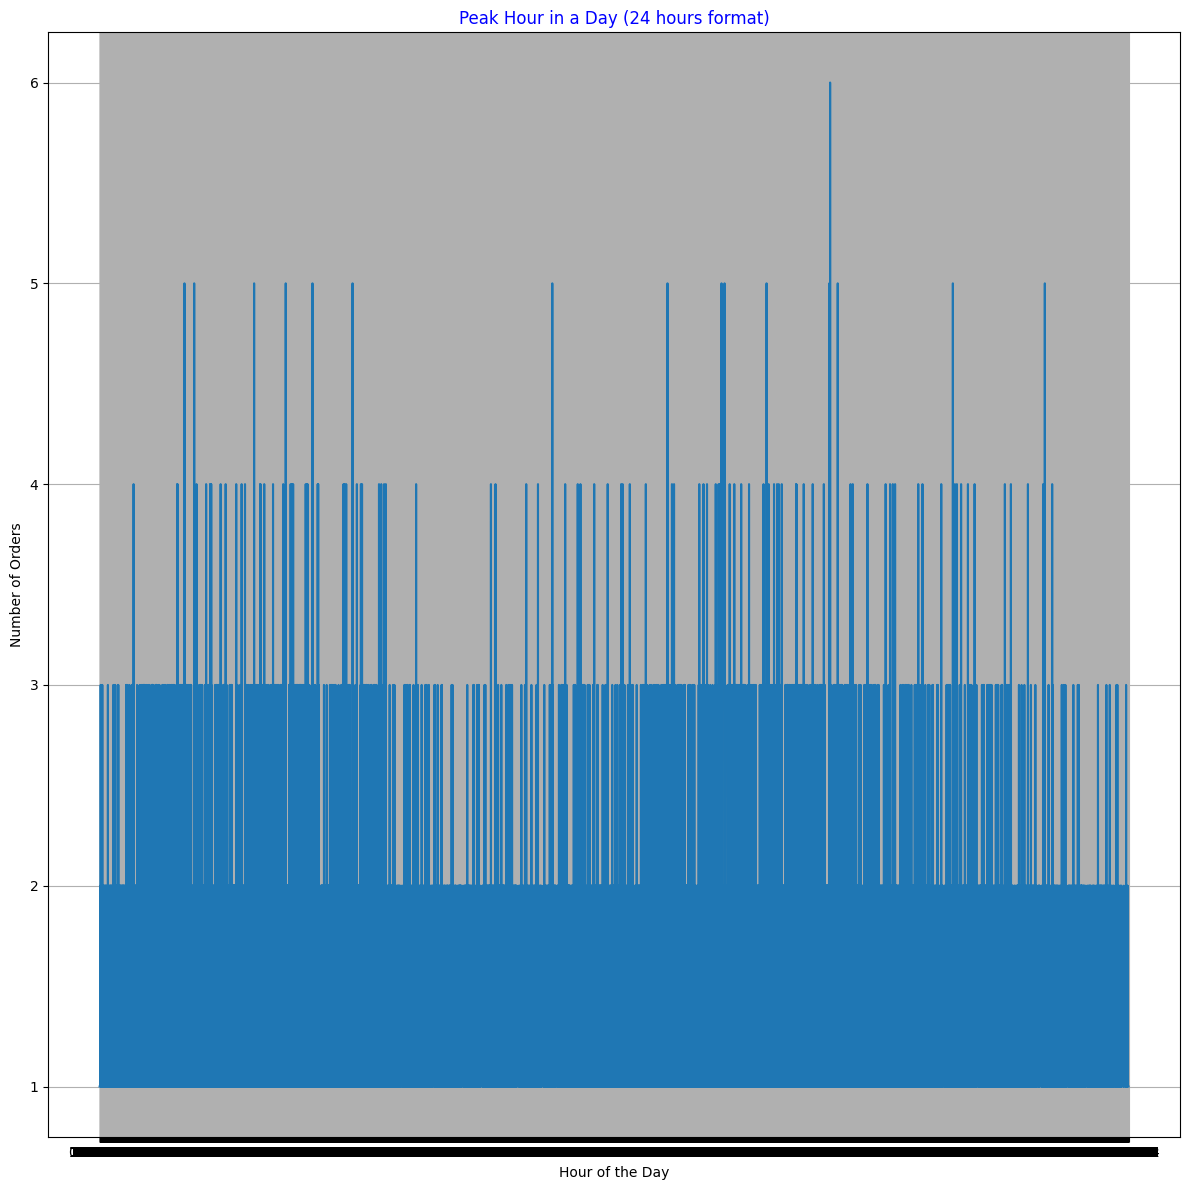

In [54]:
orders_per_hour = pizza_df.groupby('order_time')['order_id'].nunique()
# Create the line chart
plt.plot(orders_per_hour.index, orders_per_hour.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.title('Peak Hour in a Day (24 hours format)',color ='blue')
plt.tight_layout()
plt.grid()
plt.show()

In [49]:
pizza_df['order_time']= pizza_df['order_time'].astype('string')
pizza_df[['Hour','Minute', 'Second']]= pizza_df['order_time'].str.split(":",expand=True)

In [50]:
pizza_df['datetime'] = pd.to_datetime(pizza_df['order_date'].astype(str) + ' ' + pizza_df['order_time'].astype(str))
pizza_df['weekday'] = pizza_df['datetime'].dt.strftime('%A')

In [51]:
# Group the data by hour and count the number of unique orders for each hour
hourly_orders = pizza_df.groupby(pizza_df['datetime'].dt.hour)['order_id'].nunique()

# Print the count of unique orders for each hour
for hour, count in hourly_orders.items():
    print(f"Hour {hour}: {count} orders")

Hour 9: 1 orders
Hour 10: 8 orders
Hour 11: 1231 orders
Hour 12: 2520 orders
Hour 13: 2455 orders
Hour 14: 1472 orders
Hour 15: 1468 orders
Hour 16: 1920 orders
Hour 17: 2336 orders
Hour 18: 2399 orders
Hour 19: 2009 orders
Hour 20: 1642 orders
Hour 21: 1198 orders
Hour 22: 663 orders
Hour 23: 28 orders


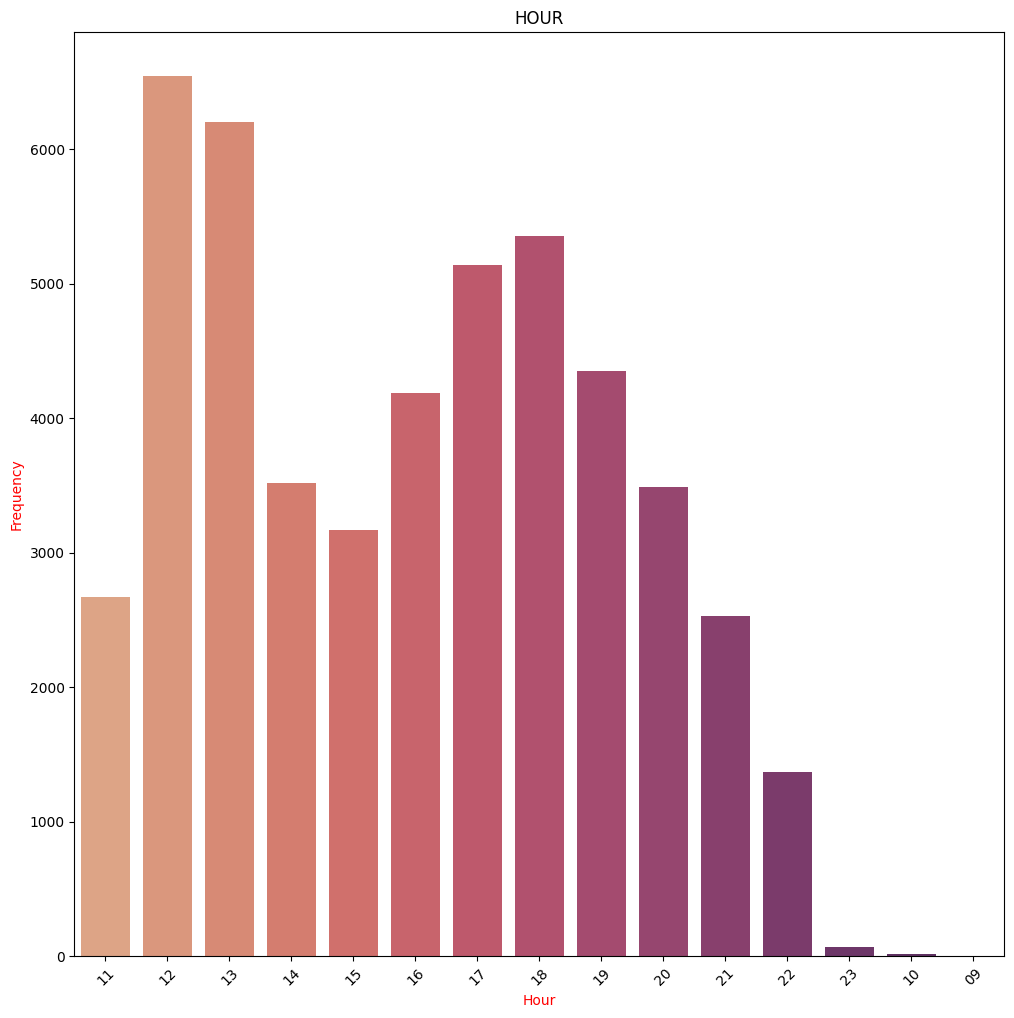

In [43]:
sns.countplot(data=pizza_df,x="Hour",palette="flare")
plt.xticks(rotation=45)
plt.xlabel("Hour",fontsize=10,color="red")
plt.ylabel("Frequency",fontsize=10,color="red")
plt.title("HOUR",color="black")
plt.show()

In [27]:
# which month has the highest revenue ?
month_revenue_analysis = pizza_df.groupby(pd.to_datetime(pizza_df['order_date']).dt.strftime('%B'))['total_price'].sum().sort_values(ascending=False)
print("Highest Revenue Months:\n", month_revenue_analysis)

Highest Revenue Months:
 order_date
July         72557.90
May          71402.75
March        70397.10
November     70395.35
January      69793.30
April        68736.80
August       68278.25
June         68230.20
February     65159.60
December     64701.15
September    64180.05
October      64027.60
Name: total_price, dtype: float64


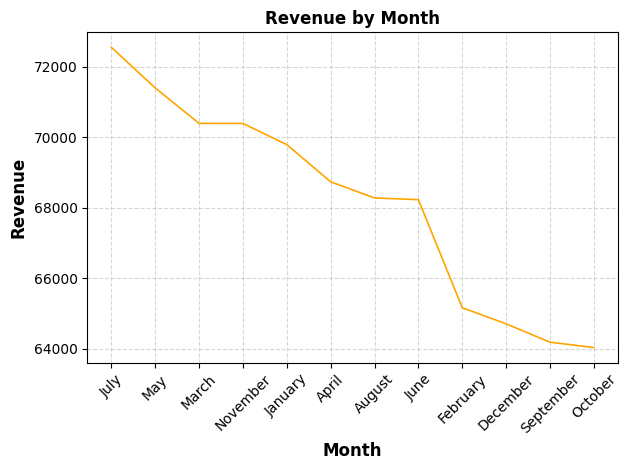

In [28]:
month_revenue_analysis.plot(kind='line', color='orange',linewidth=1.2)
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Revenue', fontsize=12, fontweight='bold')
plt.title('Revenue by Month', fontsize=12, fontweight='bold')
plt.xticks(ticks=range(len(month_revenue_analysis.index)), 
           labels=month_revenue_analysis.index, 
           rotation=45)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [33]:
# most ordered pizza
most_ordered_pizza = pizza_df.groupby('pizza_name').agg(
    order_count=('order_id', 'count'),
    average_unit_price=('unit_price', 'mean')
).nlargest(3, 'order_count')
print("Most Ordered Pizzas:\n", most_ordered_pizza)

Most Ordered Pizzas:
                             order_count  average_unit_price
pizza_name                                                 
The Classic Deluxe Pizza           2416           15.575952
The Barbecue Chicken Pizza         2372           17.572934
The Hawaiian Pizza                 2370           13.317194


In [34]:
# least ordered pizza by the customers
least_ordered_pizza = pizza_df.groupby('pizza_name').agg(
    order_count=('order_id', 'count'),
    average_unit_price=('unit_price', 'mean')
).nsmallest(3, 'order_count')
print("Most Ordered Pizzas:\n", least_ordered_pizza)

Most Ordered Pizzas:
                          order_count  average_unit_price
pizza_name                                              
The Brie Carre Pizza             480           23.650000
The Mediterranean Pizza          923           16.427952
The Calabrese Pizza              927           17.005124


In [35]:
# pizza size that is preferred by the customers?
preferred_pizza_size = pizza_df.groupby('pizza_size').agg(
    order_count=('order_id', 'count'),
    average_unit_price=('unit_price', 'mean')
).nlargest(1, 'order_count')
print("Preferred Pizza Size:\n", preferred_pizza_size)

Preferred Pizza Size:
             order_count  average_unit_price
pizza_size                                 
L                 18526           19.802553


In [36]:
# pizza category that is most preferred by the customers
preferred_pizza_category = pizza_df.groupby('pizza_category').agg(
    order_count=('order_id', 'count'),
    average_unit_price=('unit_price', 'mean')
).nlargest(1, 'order_count')
print("Preferred Pizza Category:\n", preferred_pizza_category)

Preferred Pizza Category:
                 order_count  average_unit_price
pizza_category                                 
Classic               14579            14.79749


In [37]:
# cheapest pizza
cheapest_pizza = pizza_df[['pizza_name', 'unit_price']].sort_values(by='unit_price').iloc[0]
print("Lowest Priced Pizza:\n", cheapest_pizza)

Lowest Priced Pizza:
 pizza_name    The Pepperoni Pizza
unit_price                   9.75
Name: 7636, dtype: object


In [38]:
# expensive pizza
most_exp_pizza = pizza_df[['pizza_name', 'unit_price']].sort_values(by='unit_price', ascending=False).iloc[0]
print("Lowest Priced Pizza:\n", most_exp_pizza)

Lowest Priced Pizza:
 pizza_name    The Greek Pizza
unit_price              35.95
Name: 22903, dtype: object


In [39]:
# pizza per cat
pizzas_per_category = pizza_df['pizza_category'].value_counts()
print("Number of Pizzas per Category:\n", pizzas_per_category)

Number of Pizzas per Category:
 pizza_category
Classic    14579
Supreme    11777
Veggie     11449
Chicken    10815
Name: count, dtype: int64


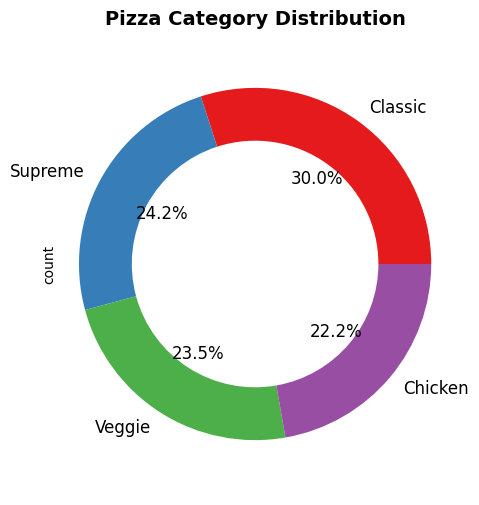

In [40]:
import matplotlib.cm as cm
color_map = plt.get_cmap('Set1')

# Plotting the pizza category distribution as a pie chart
plt.figure(figsize=(5, 6))  # Set figure size for better visibility

pizzas_per_category.plot(
    kind='pie',
    autopct='%1.1f%%',  # Display percentages on the pie chart
    colors=color_map(range(len(pizzas_per_category))),  # Apply the color map
    wedgeprops=dict(width=0.3),  # Add some space between slices (optional)
    textprops={'fontsize': 12}  # Set font size of the text
)

# Adding a title and ensuring the pie chart is a circle
plt.title('Pizza Category Distribution', fontsize=14, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle

# Show the pie chart
plt.show()


In [41]:
# num of pizza per size
pizzas_per_size = pizza_df['pizza_size'].value_counts()
print("Number of Pizzas per Size:\n", pizzas_per_size)

Number of Pizzas per Size:
 pizza_size
L      18526
M      15385
S      14137
XL       544
XXL       28
Name: count, dtype: int64


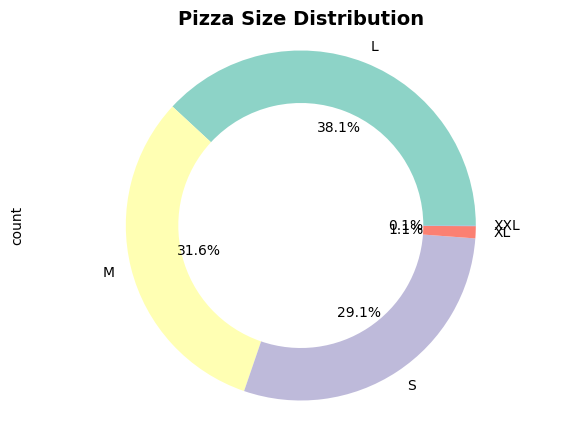

In [42]:
color_map = plt.get_cmap('Set3') 

# Plotting the pizza size distribution as a pie chart
plt.figure(figsize=(7, 5))  # Set figure size for better visibility

pizzas_per_size.plot(
    kind='pie',
    autopct='%1.1f%%',  # Display percentages on the pie chart
    colors=color_map(range(len(pizzas_per_size))),  # Apply the color map
    wedgeprops=dict(width=0.3),  # Optional: add some space between slices
    textprops={'fontsize': 10}  # Set font size of the text
)

plt.title('Pizza Size Distribution', fontsize=14, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle

plt.show()

In [44]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


Root Mean Squared Error: 0.026234294263323896
Mean Absolute Error: 0.0005987465700363469
R-squared Score: 0.9999656096707841


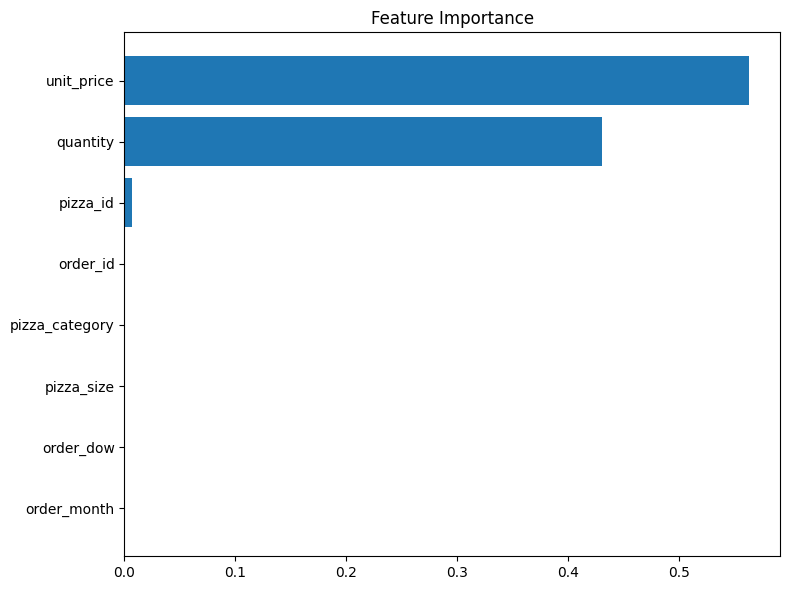

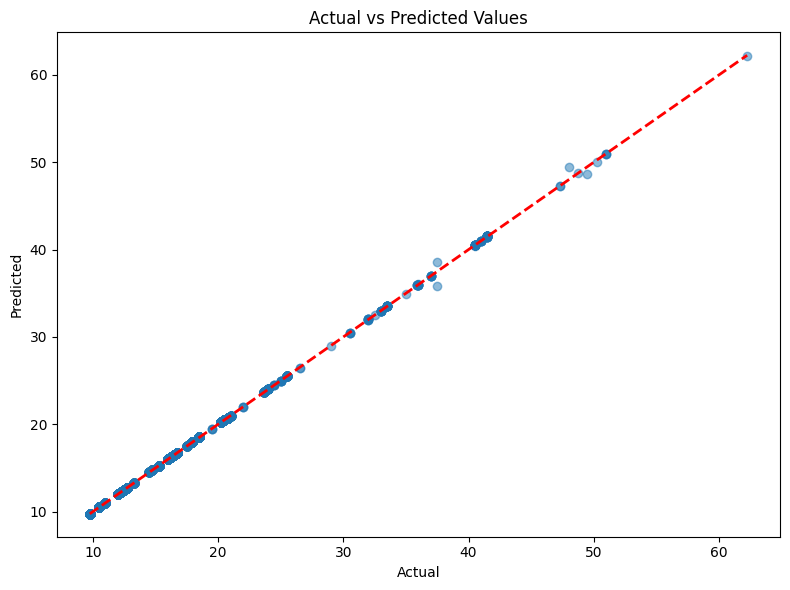

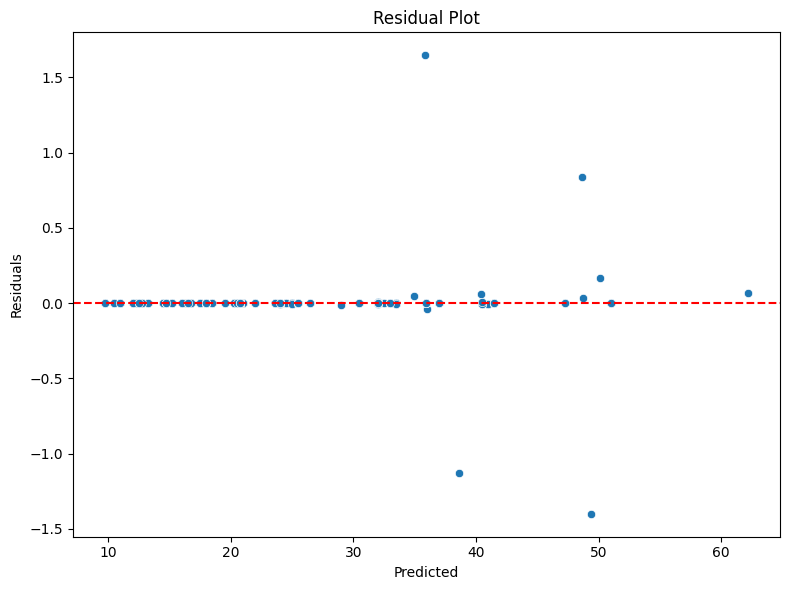

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_excel('/kaggle/input/pizza-sales/Data Model - Pizza Sales.xlsx')  # Changed to read_excel

# Preprocess the data
le = LabelEncoder()
categorical_columns = ['pizza_id', 'pizza_size', 'pizza_category', 'pizza_name']
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Convert datetime columns
df['order_date'] = pd.to_datetime(df['order_date'])
df['order_dow'] = df['order_date'].dt.dayofweek
df['order_month'] = df['order_date'].dt.month

# Select features and target
features = ['order_id', 'pizza_id', 'quantity', 'unit_price', 'pizza_size', 
            'pizza_category', 'order_dow', 'order_month']
target = 'total_price'

X = df[features]
y = df[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
model = xgb.XGBRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared Score: {r2}")

# Feature importance
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(pos, feature_importance[sorted_idx], align='center')
ax.set_yticks(pos)
ax.set_yticklabels(np.array(features)[sorted_idx])
ax.set_title('Feature Importance')
plt.tight_layout()
plt.show()

# Scatter plot of predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.tight_layout()
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.tight_layout()
plt.show()

Root Mean Squared Error: 0.0877119222161287
Mean Absolute Error: 0.001699660633486103
R-squared Score: 0.999615572170532


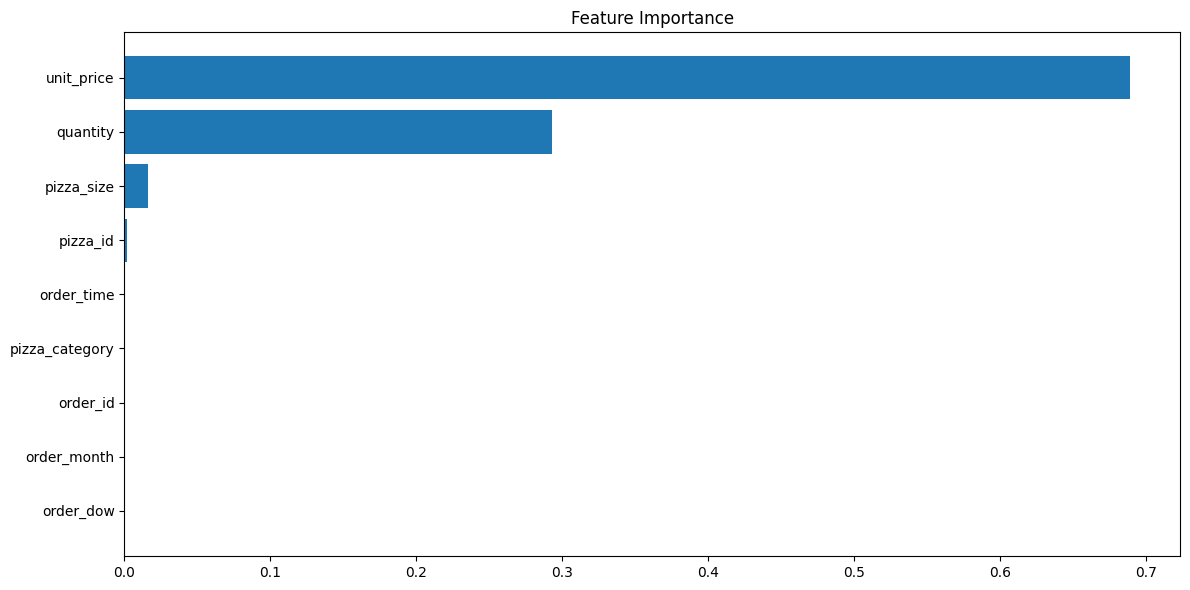

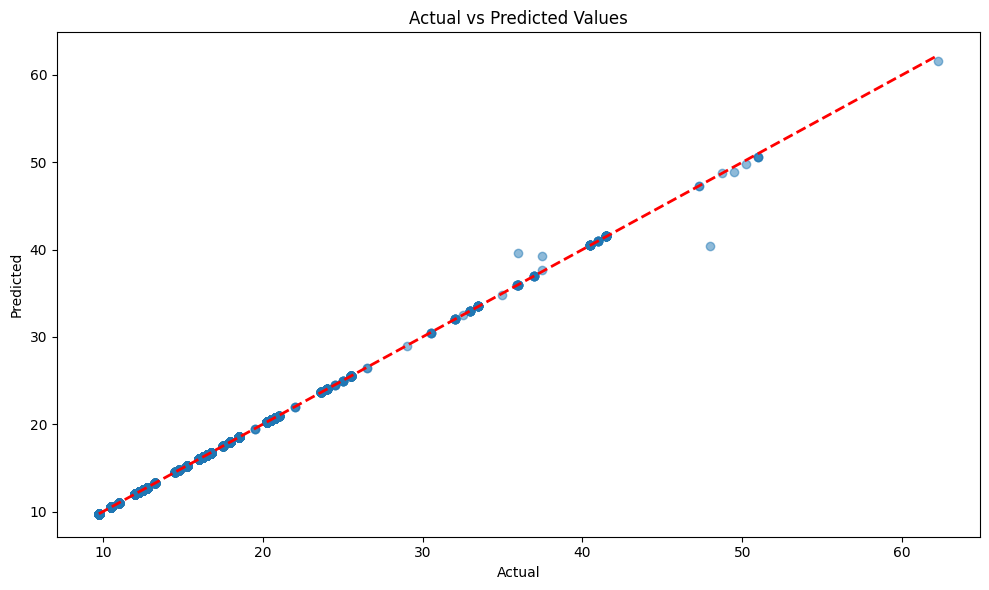

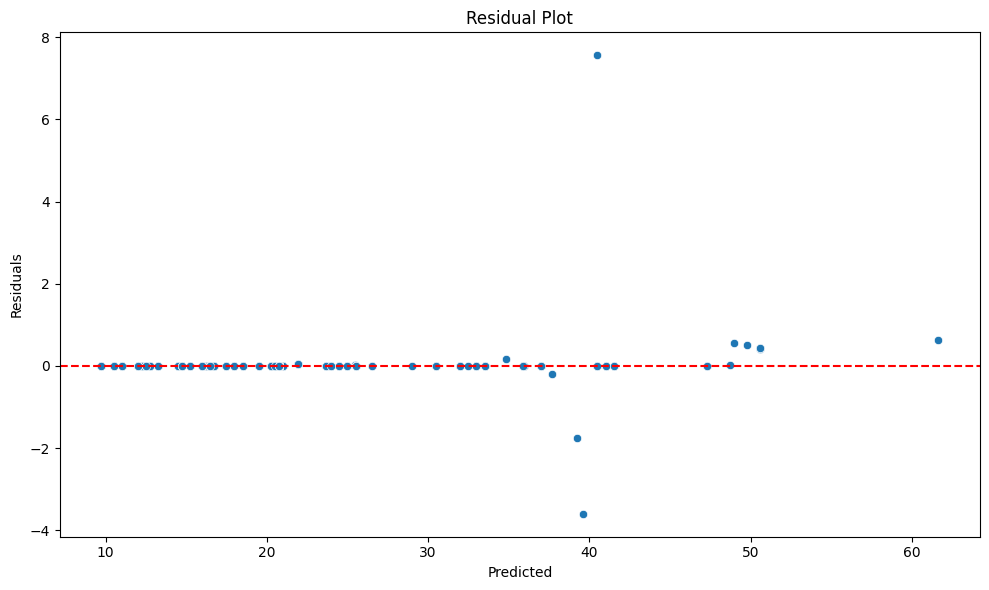

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_excel('/kaggle/input/pizza-sales/Data Model - Pizza Sales.xlsx')

# Preprocess the data
le = LabelEncoder()
categorical_columns = ['pizza_id', 'pizza_size', 'pizza_category', 'pizza_name', 'order_time']
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Convert datetime columns
df['order_date'] = pd.to_datetime(df['order_date'])
df['order_dow'] = df['order_date'].dt.dayofweek
df['order_month'] = df['order_date'].dt.month

# Select features and target
features = ['order_id', 'pizza_id', 'quantity', 'unit_price', 'pizza_size', 
            'pizza_category', 'order_dow', 'order_month', 'order_time']
target = 'total_price'

X = df[features]
y = df[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared Score: {r2}")

# Feature importance
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(pos, feature_importance[sorted_idx], align='center')
ax.set_yticks(pos)
ax.set_yticklabels(np.array(features)[sorted_idx])
ax.set_title('Feature Importance')
plt.tight_layout()
plt.show()

# Scatter plot of predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.tight_layout()
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.tight_layout()
plt.show()

Random Forest Results:
cv_rmse: 0.10994899012119733
rmse: 0.041926755760754573
mae: 0.0004995680789835774
r2: 0.9999107239914717

XGBoost Results:
cv_rmse: 0.082314346014842
rmse: 0.0004387580696875681
mae: 5.0801995456682644e-05
r2: 0.9999999902230705


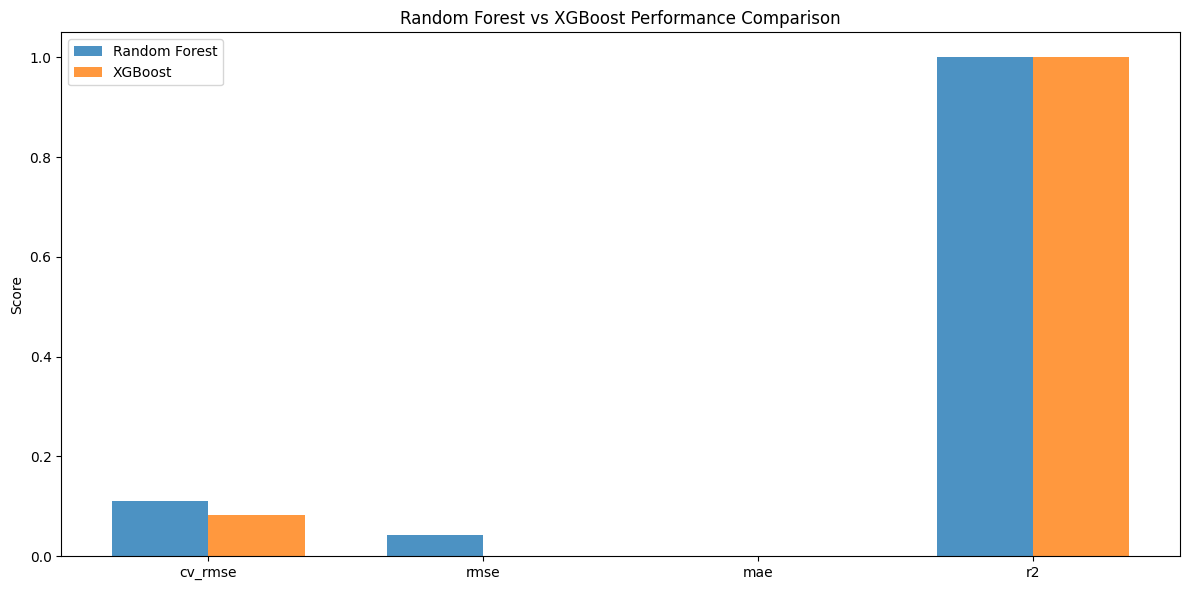

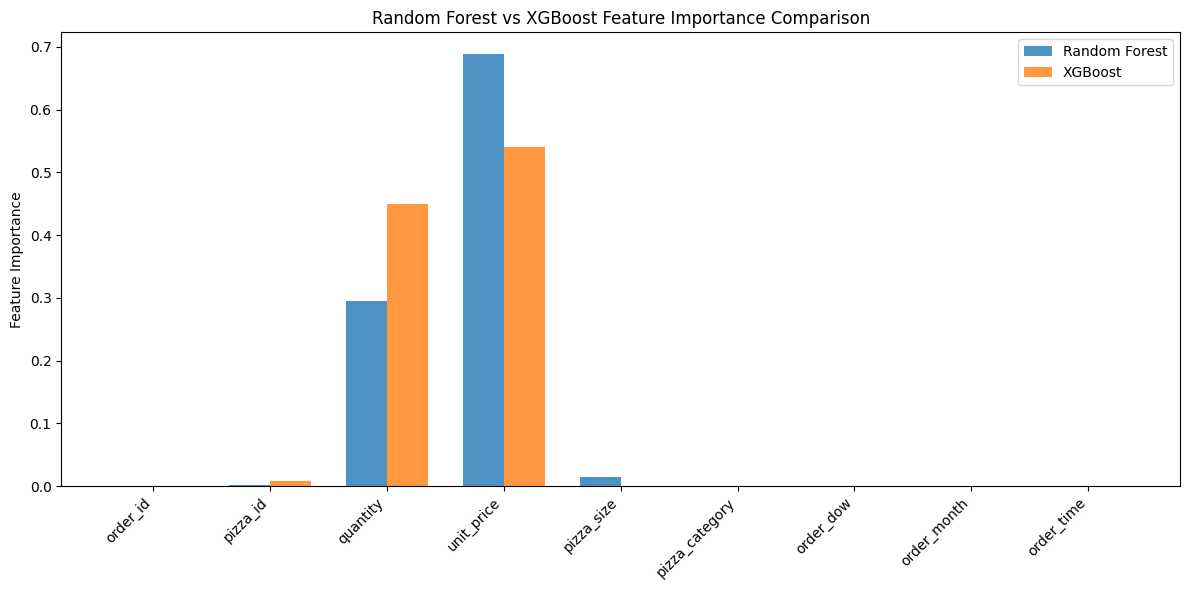

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_excel('/kaggle/input/pizza-sales/Data Model - Pizza Sales.xlsx')

# Preprocess the data
le = LabelEncoder()
categorical_columns = ['pizza_id', 'pizza_size', 'pizza_category', 'pizza_name', 'order_time']
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Convert datetime columns
df['order_date'] = pd.to_datetime(df['order_date'])
df['order_dow'] = df['order_date'].dt.dayofweek
df['order_month'] = df['order_date'].dt.month

# Select features and target
features = ['order_id', 'pizza_id', 'quantity', 'unit_price', 'pizza_size', 
            'pizza_category', 'order_dow', 'order_month', 'order_time']
target = 'total_price'

X = df[features]
y = df[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model = xgb.XGBRegressor(random_state=42)

# Function to evaluate model
def evaluate_model(model, X, y):
    # Perform 5-fold cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-cv_scores)
    
    # Train the model on the entire dataset
    model.fit(X, y)
    
    # Make predictions
    y_pred = model.predict(X)
    
    # Calculate metrics
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    
    return {
        'cv_rmse': rmse_scores.mean(),
        'rmse': rmse,
        'mae': mae,
        'r2': r2
    }

# Evaluate models
rf_results = evaluate_model(rf_model, X, y)
xgb_results = evaluate_model(xgb_model, X, y)

# Print results
print("Random Forest Results:")
for metric, value in rf_results.items():
    print(f"{metric}: {value}")

print("\nXGBoost Results:")
for metric, value in xgb_results.items():
    print(f"{metric}: {value}")

# Visualize results
metrics = ['cv_rmse', 'rmse', 'mae', 'r2']
rf_values = [rf_results[m] for m in metrics]
xgb_values = [xgb_results[m] for m in metrics]

plt.figure(figsize=(12, 6))
x = range(len(metrics))
width = 0.35
plt.bar([i - width/2 for i in x], rf_values, width, label='Random Forest', alpha=0.8)
plt.bar([i + width/2 for i in x], xgb_values, width, label='XGBoost', alpha=0.8)
plt.ylabel('Score')
plt.title('Random Forest vs XGBoost Performance Comparison')
plt.xticks(x, metrics)
plt.legend()
plt.tight_layout()
plt.show()

# Train final models on entire dataset
rf_model.fit(X, y)
xgb_model.fit(X, y)

# Compare feature importance
rf_importance = rf_model.feature_importances_
xgb_importance = xgb_model.feature_importances_

plt.figure(figsize=(12, 6))
x = range(len(features))
width = 0.35
plt.bar([i - width/2 for i in x], rf_importance, width, label='Random Forest', alpha=0.8)
plt.bar([i + width/2 for i in x], xgb_importance, width, label='XGBoost', alpha=0.8)
plt.ylabel('Feature Importance')
plt.title('Random Forest vs XGBoost Feature Importance Comparison')
plt.xticks(x, features, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# list of corrections 
# revenue -- >
# remove avg unit price
# average sales
# check the ingredient
# change the ascending 
# do a correlational analysis

**Correlational Analysis of the Dataset**